In [1]:
# sc master running locally
sc.master

import warnings
warnings.filterwarnings("ignore")

# spark is from the previous example.
sc = spark.sparkContext

In [2]:
path = "/user1/Suicide_Detection.csv"
df = spark.read.csv(path)

In [3]:
# The inferred schema can be visualized using the printSchema() method
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)



In [4]:
# Rename the columns
df = df.withColumnRenamed('_c0', 'ID')      # Rename _c0 to ID
df = df.withColumnRenamed('_c1', 'Text')    # Rename _c1 to Text
df = df.withColumnRenamed('_c2', 'Label')   # Rename _c2 to Label

# Show the DataFrame with renamed columns
df.show(5)

+----+--------------------+-----------+
|  ID|                Text|      Label|
+----+--------------------+-----------+
|null|                text|      class|
|   2|Ex Wife Threateni...|    suicide|
|   3|Am I weird I don'...|non-suicide|
|   4|"Finally 2020 is ...|non-suicide|
|   8|i need helpjust h...|    suicide|
+----+--------------------+-----------+
only showing top 5 rows



In [5]:
# Count Rows
row_count = df.count()
print("Total Rows:", row_count)

# Get Schema
df.printSchema()

Total Rows: 664905
root
 |-- ID: string (nullable = true)
 |-- Text: string (nullable = true)
 |-- Label: string (nullable = true)



In [6]:
from pyspark.sql.functions import col

# "ID" column datatype changing
df = df.withColumn("ID", col("ID").cast("integer"))

In [7]:
# Remove rows with null values in any column
df = df.na.drop()

In [8]:
from pyspark.sql.functions import col

# Filter the DataFrame to include only 'suicide' and 'non-suicide' labels
df = df.filter((col('Label') == 'suicide') | (col('Label') == 'non-suicide'))

# Show the resulting DataFrame
df.show()

+---+--------------------+-----------+
| ID|                Text|      Label|
+---+--------------------+-----------+
|  2|Ex Wife Threateni...|    suicide|
|  3|Am I weird I don'...|non-suicide|
|  4|"Finally 2020 is ...|non-suicide|
|  8|i need helpjust h...|    suicide|
| 18|My life is over a...|    suicide|
| 19|I took the rest o...|    suicide|
| 21|Do you think gett...|    suicide|
| 23|Been arrested - f...|    suicide|
| 24|Fuck the verizon ...|non-suicide|
| 31|Me: I know I have...|non-suicide|
| 37|Guys I want frien...|non-suicide|
| 39|I’m trashLol I no...|    suicide|
| 41|What is the best ...|    suicide|
| 43|Today's fact is R...|non-suicide|
| 44|I feel like I am ...|    suicide|
| 45|Is it worth it?Is...|    suicide|
| 47|I triple nipple d...|non-suicide|
| 54|Hey, im gonna sle...|non-suicide|
| 57|I learnt a new sk...|non-suicide|
| 62|Why does no one u...|non-suicide|
+---+--------------------+-----------+
only showing top 20 rows



In [9]:
# Assuming 'df' is your DataFrame and 'Label' is the column of interest
label_counts = df.groupBy("Label").count().orderBy(col("count").desc())

# Show the label counts
label_counts.show()

+-----------+-----+
|      Label|count|
+-----------+-----+
|non-suicide|76506|
|    suicide|53612|
+-----------+-----+



In [10]:
df.show(2, truncate=False)

+---+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------+
|ID |Text                                                                                                                                                                                                                                                                 

In [11]:
from pyspark.ml.feature import Tokenizer

# Create a Tokenizer object
tokenizer = Tokenizer(inputCol="Text", outputCol="tokens")

# Tokenize the "processed_text" column
df = tokenizer.transform(df)

# Show the result
df.show(truncate=False)

+---+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [12]:
# Show the "tokens" column
token_df = df.select("tokens")

token_df.show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [13]:
df.show(5, truncate=True)

+---+--------------------+-----------+--------------------+
| ID|                Text|      Label|              tokens|
+---+--------------------+-----------+--------------------+
|  2|Ex Wife Threateni...|    suicide|[ex, wife, threat...|
|  3|Am I weird I don'...|non-suicide|[am, i, weird, i,...|
|  4|"Finally 2020 is ...|non-suicide|["finally, 2020, ...|
|  8|i need helpjust h...|    suicide|[i, need, helpjus...|
| 18|My life is over a...|    suicide|[my, life, is, ov...|
+---+--------------------+-----------+--------------------+
only showing top 5 rows



In [49]:
from pyspark.sql.functions import explode, desc
from pyspark.sql import functions as F

# Explode the tokens into separate rows
counting_df = df.withColumn("word", explode(df["tokens"]))

# Group by words and count their occurrences
word_counts = counting_df.groupBy("word").count()

# Order the word counts in descending order
word_counts = word_counts.orderBy(desc("count"))

# Select the top 50 words
top_20_words = word_counts.limit(20)

In [50]:
# Show the top 50 words and their counts
top_20_words.show(50)

+----+------+
|word| count|
+----+------+
|   i|476118|
|  to|277623|
| and|236422|
| the|167139|
|  my|165837|
|   a|164026|
|  of|106558|
|  it| 87695|
|  me| 85530|
|just| 83531|
|  is| 79251|
|  in| 78412|
| but| 77786|
|that| 72752|
|have| 72492|
| for| 70323|
|  so| 66496|
|this| 57312|
|like| 54352|
| i'm| 53014|
+----+------+



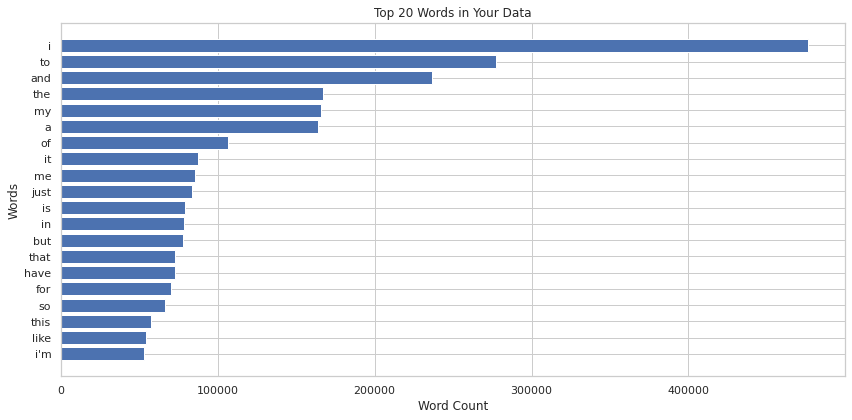

In [51]:
import matplotlib.pyplot as plt

# Extract the word and count columns from the DataFrame
words = [row['word'] for row in top_20_words.collect()]
counts = [row['count'] for row in top_20_words.collect()]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.barh(words, counts)
plt.xlabel('Word Count')
plt.ylabel('Words')
plt.title('Top 20 Words in Your Data')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent word at the top
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Text: string (nullable = true)
 |-- Label: string (nullable = true)
 |-- tokens: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [17]:
from pyspark.sql.functions import size
from pyspark.sql import types as T

# Define the maximum sequence length you want
max_sequence_length = 50

# Define a function to pad sequences
def pad_sequence(tokens, length):
    return tokens + [""] * (length - len(tokens))

# Create a UDF to apply the padding function
pad_udf = F.udf(lambda tokens: pad_sequence(tokens, max_sequence_length), T.ArrayType(T.StringType()))

# Apply the UDF to pad the sequences
df = df.withColumn("padded_tokens", pad_udf(df["tokens"]))

# Select the relevant columns: ID, padded_tokens, and Label
final_df = df.select("ID", "padded_tokens", "Label")

# Show the resulting DataFrame
final_df.show(5, truncate=False)

+---+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [18]:
final_df.show(5, truncate=True)

+---+--------------------+-----------+
| ID|       padded_tokens|      Label|
+---+--------------------+-----------+
|  2|[ex, wife, threat...|    suicide|
|  3|[am, i, weird, i,...|non-suicide|
|  4|["finally, 2020, ...|non-suicide|
|  8|[i, need, helpjus...|    suicide|
| 18|[my, life, is, ov...|    suicide|
+---+--------------------+-----------+
only showing top 5 rows



In [19]:
from pyspark.ml.feature import StringIndexer

# Initialize the StringIndexer
label_indexer = StringIndexer(inputCol="Label", outputCol="LabelIndex")

# Fit the StringIndexer on your DataFrame
indexed_df = label_indexer.fit(df).transform(df)

# Show the resulting DataFrame
indexed_df.show(2, truncate=True)

+---+--------------------+-----------+--------------------+--------------------+----------+
| ID|                Text|      Label|              tokens|       padded_tokens|LabelIndex|
+---+--------------------+-----------+--------------------+--------------------+----------+
|  2|Ex Wife Threateni...|    suicide|[ex, wife, threat...|[ex, wife, threat...|       1.0|
|  3|Am I weird I don'...|non-suicide|[am, i, weird, i,...|[am, i, weird, i,...|       0.0|
+---+--------------------+-----------+--------------------+--------------------+----------+
only showing top 2 rows



In [20]:
from pyspark.ml.feature import Word2Vec

# Define Word2Vec parameters
word2vec = Word2Vec(
    vectorSize=100,       # Set the size of the word vectors
    seed=42,              # Set a seed for reproducibility
    inputCol="padded_tokens",  # Specify the input column with your tokenized and padded text
    outputCol="word_vectors"   # Specify the output column for word vectors
)

In [21]:
# Train the Word2Vec model
word2vec_model = word2vec.fit(indexed_df)

In [22]:
# Transform your DataFrame to include word vectors
df = word2vec_model.transform(indexed_df)

In [23]:
df.show(1, truncate=True)

+---+--------------------+-------+--------------------+--------------------+----------+--------------------+
| ID|                Text|  Label|              tokens|       padded_tokens|LabelIndex|        word_vectors|
+---+--------------------+-------+--------------------+--------------------+----------+--------------------+
|  2|Ex Wife Threateni...|suicide|[ex, wife, threat...|[ex, wife, threat...|       1.0|[0.15129990431958...|
+---+--------------------+-------+--------------------+--------------------+----------+--------------------+
only showing top 1 row



In [24]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline

# Initialize the StandardScaler
scaler = StandardScaler(inputCol="word_vectors", outputCol="scaled_word_vectors", withMean=True, withStd=True)

In [25]:
# Create a Pipeline to apply the scaler
pipeline = Pipeline(stages=[scaler])

In [26]:
# Fit and transform your DataFrame using the pipeline
scaled_df = pipeline.fit(df).transform(df)

In [27]:
scaled_df.show(5, truncate=True)

+---+--------------------+-----------+--------------------+--------------------+----------+--------------------+--------------------+
| ID|                Text|      Label|              tokens|       padded_tokens|LabelIndex|        word_vectors| scaled_word_vectors|
+---+--------------------+-----------+--------------------+--------------------+----------+--------------------+--------------------+
|  2|Ex Wife Threateni...|    suicide|[ex, wife, threat...|[ex, wife, threat...|       1.0|[0.15129990431958...|[1.20124083637301...|
|  3|Am I weird I don'...|non-suicide|[am, i, weird, i,...|[am, i, weird, i,...|       0.0|[-0.0481562759727...|[-0.1914851304084...|
|  4|"Finally 2020 is ...|non-suicide|["finally, 2020, ...|["finally, 2020, ...|       0.0|[-0.0920528553985...|[-0.4979980994705...|
|  8|i need helpjust h...|    suicide|[i, need, helpjus...|[i, need, helpjus...|       1.0|[-0.1856799309793...|[-1.1517600393823...|
| 18|My life is over a...|    suicide|[my, life, is, ov...|[my

In [28]:
scaled_df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Text: string (nullable = true)
 |-- Label: string (nullable = true)
 |-- tokens: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- padded_tokens: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- LabelIndex: double (nullable = false)
 |-- word_vectors: vector (nullable = true)
 |-- scaled_word_vectors: vector (nullable = true)



In [29]:
from torch import nn, optim, Tensor
import torch
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm import tqdm
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [30]:
# Extract relevant columns
scaled_word_vectors = scaled_df.select("scaled_word_vectors").rdd.flatMap(lambda x: x).collect()
labels = scaled_df.select("LabelIndex").rdd.flatMap(lambda x: x).collect()

In [31]:
# Convert scaled_word_vectors to NumPy array
X = np.array(scaled_word_vectors)

In [32]:
# Convert labels to NumPy array
y = np.array(labels)

In [33]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
import torch

# Assuming you have X_train, X_validation, y_train, and y_validation prepared

# Convert NumPy arrays to PyTorch tensors for training and validation sets
X_train = torch.tensor(X_train, dtype=torch.float32)
X_validation = torch.tensor(X_validation, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_validation = torch.tensor(y_validation, dtype=torch.float32)

In [35]:
# Define the RNN model using PyTorch
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Use the last LSTM output
        return out

In [36]:
# Model configuration
input_size = X_train.shape[1]
hidden_size = 100
output_size = 1  # Binary classification
model = RNNModel(input_size, hidden_size, output_size)

In [37]:
# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [38]:
# Training parameters
num_epochs, batch_size, verbose = 10, 32, 1

In [39]:
# Prepare DataLoaders for training and validation
train_dataset = TensorDataset(X_train.unsqueeze(1), y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

validation_dataset = TensorDataset(X_validation.unsqueeze(1), y_validation)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)


In [40]:
# Initialize lists to store training and validation losses
train_losses = []  # List to store training losses
validation_losses = []   # List to store validation losses

In [41]:
train_losses = []       # List to store training losses
validation_losses = []  # List to store validation losses
train_accuracies = []   # List to store training accuracies
validation_accuracies = []  # List to store validation accuracies

for epoch in range(num_epochs):
    train_total_loss, train_correct_predictions = 0.0, 0
    validation_total_loss, validation_correct_predictions = 0.0, 0

    # Training loop
    model.train()  # Set the model in training mode
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        
        train_total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        train_correct_predictions += (predicted.squeeze() == labels).sum().item()
    
    average_train_loss = train_total_loss / len(train_loader)
    train_accuracy = train_correct_predictions / len(train_dataset)
    
    train_losses.append(average_train_loss)  # Append training loss for this epoch
    train_accuracies.append(train_accuracy)  # Append training accuracy for this epoch
    
    if verbose:
        print(f"Epoch {epoch + 1}/{num_epochs}: Training Loss: {average_train_loss}, Training Accuracy: {train_accuracy}")
    
    # Validation loop
    model.eval()  # Set the model in evaluation mode
    
    with torch.no_grad():
        for inputs, labels in validation_loader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            validation_total_loss += loss.item()
            
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            validation_correct_predictions += (predicted.squeeze() == labels).sum().item()
    
    average_validation_loss = validation_total_loss / len(validation_loader)
    validation_accuracy = validation_correct_predictions / len(validation_dataset)
    
    validation_losses.append(average_validation_loss)  # Append validation loss for this epoch
    validation_accuracies.append(validation_accuracy)  # Append validation accuracy for this epoch
    
    if verbose:
        print(f"Epoch {epoch + 1}/{num_epochs}: Validation Loss: {average_validation_loss}, Validation Accuracy: {validation_accuracy}")

Epoch 1/50: Training Loss: 0.26254859903258726, Training Accuracy: 0.8940957211750917
Epoch 1/50: Validation Loss: 0.23314604406412096, Validation Accuracy: 0.9058177067322472
Epoch 2/50: Training Loss: 0.2346226280521346, Training Accuracy: 0.9062289853401733
Epoch 2/50: Validation Loss: 0.21958707780085265, Validation Accuracy: 0.9107362434675684
Epoch 3/50: Training Loss: 0.2274876530999372, Training Accuracy: 0.9091398159355967
Epoch 3/50: Validation Loss: 0.21201947724551914, Validation Accuracy: 0.9166538579772517
Epoch 4/50: Training Loss: 0.2213443728227396, Training Accuracy: 0.9116951985705228
Epoch 4/50: Validation Loss: 0.21572040002884604, Validation Accuracy: 0.9128881032892714
Epoch 5/50: Training Loss: 0.21680247845615455, Training Accuracy: 0.9131650239206871
Epoch 5/50: Validation Loss: 0.22622663431162476, Validation Accuracy: 0.906855210574854
Epoch 6/50: Training Loss: 0.21272798839646176, Training Accuracy: 0.9157876534670586
Epoch 6/50: Validation Loss: 0.2094152

Epoch 48/50: Training Loss: 0.12198906802809077, Training Accuracy: 0.953253789843795
Epoch 48/50: Validation Loss: 0.2692171027008627, Validation Accuracy: 0.911043652013526
Epoch 49/50: Training Loss: 0.12039844250541823, Training Accuracy: 0.9546083347743386
Epoch 49/50: Validation Loss: 0.2741088763243205, Validation Accuracy: 0.9101214263756533
Epoch 50/50: Training Loss: 0.11858522027640472, Training Accuracy: 0.9547620420004995
Epoch 50/50: Validation Loss: 0.27285027584742927, Validation Accuracy: 0.9117737473101752


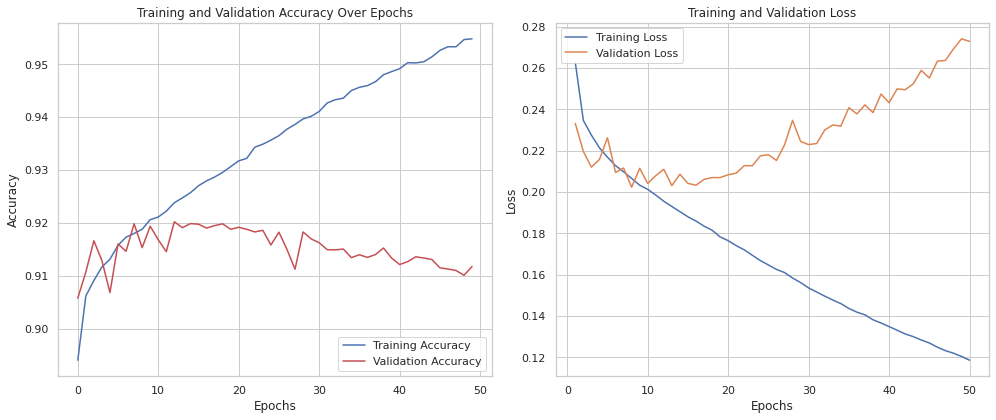

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have 'train_accuracies', 'validation_accuracies', 'train_losses', and 'validation_losses' lists

sns.set(style="whitegrid")  # Set Seaborn style

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot training and validation accuracy
for data, label, color in [(train_accuracies, 'Training Accuracy', 'b'), (validation_accuracies, 'Validation Accuracy', 'r')]:
    ax1.plot(data, label=label, color=color)

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy Over Epochs')
ax1.legend(loc='lower right')

# Plot training and validation loss
epochs = range(1, num_epochs + 1)
for data, label in [(train_losses, 'Training Loss'), (validation_losses, 'Validation Loss')]:
    ax2.plot(epochs, data, label=label)

ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from torch.utils.data import TensorDataset, DataLoader

# Create a test dataset using your X_test and y_test
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))

In [45]:
from sklearn.metrics import confusion_matrix

# Assuming you have prepared a test dataset named 'test_dataset'
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize variables to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Set the model in evaluation mode
model.eval()

# Initialize lists to store test losses and correct predictions
test_losses = []
correct_predictions = 0

# Disable gradient calculation during evaluation
with torch.no_grad():
    for inputs, labels in test_loader:
        # Reshape inputs to match the model's input requirements
        inputs = inputs.unsqueeze(1)  # Add a sequence length dimension
        
        # Forward pass
        outputs = model(inputs)
        
        # Calculate test loss
        test_loss = criterion(outputs.squeeze(), labels)
        test_losses.append(test_loss.item())
        
        # Calculate predictions and accuracy
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_predictions += (predicted.squeeze() == labels).sum().item()
        
        # Append true labels and predicted labels to the lists
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Calculate average test loss and accuracy
test_average_loss = sum(test_losses) / len(test_losses)
test_accuracy = correct_predictions / len(test_dataset)

# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print test results and confusion matrix
print(f"Test Loss: {test_average_loss}, Test Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Test Loss: 0.27285027584742927, Test Accuracy: 0.9117737473101752
Confusion Matrix:
[[14213  1127]
 [ 1169  9515]]


In [46]:
# Calculate and print performance metrics
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Accuracy: 0.9118
Precision: 0.8941
Recall (Sensitivity): 0.8906
Specificity: 0.9265
F1 Score: 0.8923
